<a href="https://colab.research.google.com/github/cxrlton/YOLO--ALGO-filtered-/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!gdown https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

Downloading...
From: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
To: /content/coco.names
625B [00:00, 2.37MB/s]       


In [14]:
cd /content/drive

/content/drive


In [18]:
ls

 2AC669C2-0A21-4FF4-99F6-72F33C6EB98C.png
 AI116.zip
 ari116.zip
'Colab Notebooks'/
'docker 2.zip'
 docker.zip
 DT-1.zip
'Economics se20uari116 A9 Pradham Mummaleti.mp3'
'Getting started.pdf'
 hmm.pdf
'nlp assignment.pdf'
'nlp assn 2.pdf'
'nlp assn 2 se20uari116.pdf'
 piecewise_linear_regression.py
'Resume (1).pdf'
 Resume.pdf
'se20uari116 class project.py'
 se20uari116_jenkins.pdf
 SE20UARI116.pdf
 se20uari116_selab4.pdf
 selab5_se20uari116.pdf
'se_lab ARI116.drawio.pdf'
'T-Shirt Sign Up.gform'
'Untitled form.gform'
 yolo@


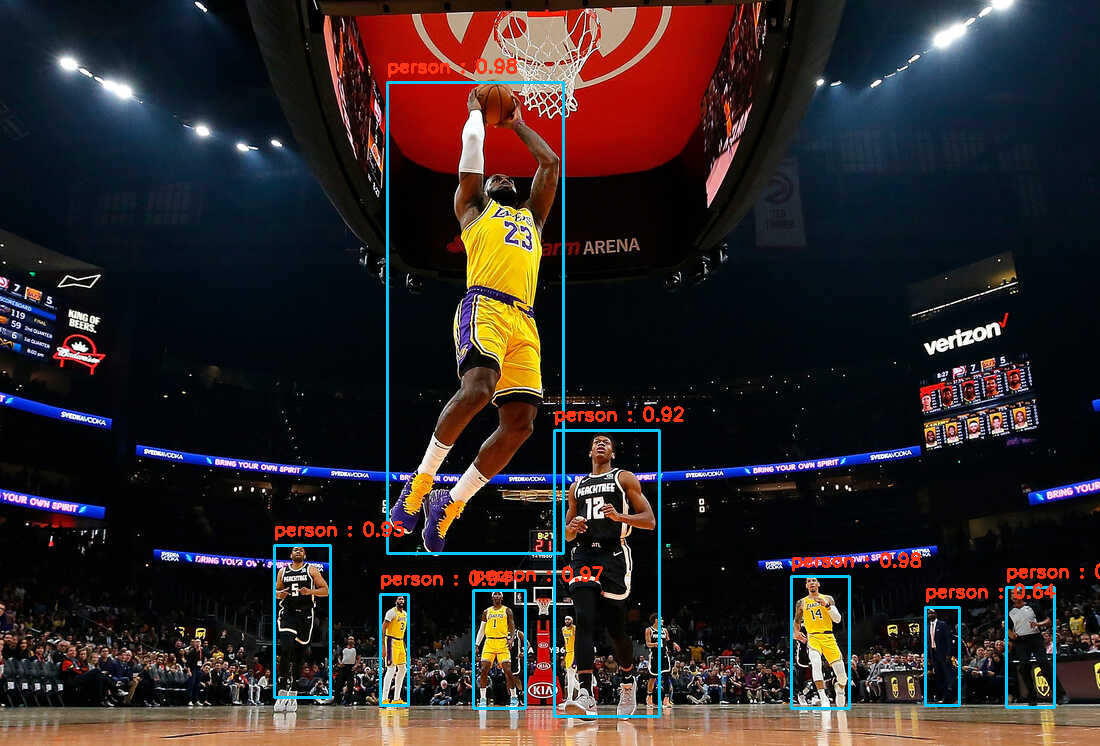

In [22]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]

img = cv2.imread("/content/drive/MyDrive/bron_dunk.jpeg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)

for (classid, score, box) in zip(classes, scores, boxes):
        label = "%s : %.2f" % (class_names[classid],score)
        if class_names[classid] == 'person':
          cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
          cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
cv2_imshow(img)